In [1]:

#Title = 1.Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neural network. Use Boston House price predictiondataset.


In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


I:\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('HousingData.csv')
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
data.show()

AttributeError: 'DataFrame' object has no attribute 'show'

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
X = data[['RM', 'DIS', 'LSTAT']]
y = data['MEDV']
#he goal is to predict the median value of owner-occupied homes ('MEDV') based on features
#like average number of rooms per dwelling ('RM'), weighted distances to five Boston employment centers ('DIS'),
#and percentage of lower status of the population ('LSTAT').

In [8]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [9]:
scaler = StandardScaler() #for standardization
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)
# transforming the data such that it has a mean of 0 and a standard deviation of 1

In [10]:
# Define the model with additional layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(train_x.shape[1],), activation='relu'),  # Hidden layer 1 with 64 neurons and ReLU activation
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer 2 with 32 neurons and ReLU activation
    tf.keras.layers.Dense(1, activation=None)  # Output layer with linear activation
])


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
# Train the model
history = model.fit(train_x, train_y, epochs=50, batch_size=64, validation_split=0.2)
#epochs:specifies the number of times the model will go through the entire training dataset.
#During one epoch, the neural network processes the entire dataset in batches, updates its weights, and calculates the loss.
#batch_size=64 defines the number of samples that will be propagated through the network at once before updating the weights.4
#validation_split=0.2 means that during training, 20% of the training data will be used as validation data
# Evaluate the model
#no of epochs:If the validation loss starts to increase while the training loss decreases, stop. 50-100 starting point.
test_loss = model.evaluate(test_x, test_y)
print("Test Loss:", test_loss)
#model.evaluate() computes the loss for the test dataset using the specified loss function (mean squared error in this case)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 495.2571 - val_loss: 452.0951
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 385.2404 - val_loss: 392.9456
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 348.3328 - val_loss: 342.2957
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 292.0972 - val_loss: 300.6805
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 259.6729 - val_loss: 266.9255
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 240.7026 - val_loss: 240.8016
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 220.1803 - val_loss: 220.6897
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 196.3857 - val_loss: 203.8289
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 171.5977 - val_loss: 187.9471
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 155.3332 - val_loss: 171.7568
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 146.1086 - val_loss: 154.5681
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on test data
y_pred = model.predict(test_x)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(test_y, y_pred)
print("R-squared:", r2)
#for good model high r2 and low mae mse


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Mean Absolute Error: 3.2182663808895065
Mean Squared Error: 23.64206515907302
R-squared: 0.6812772077182243


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


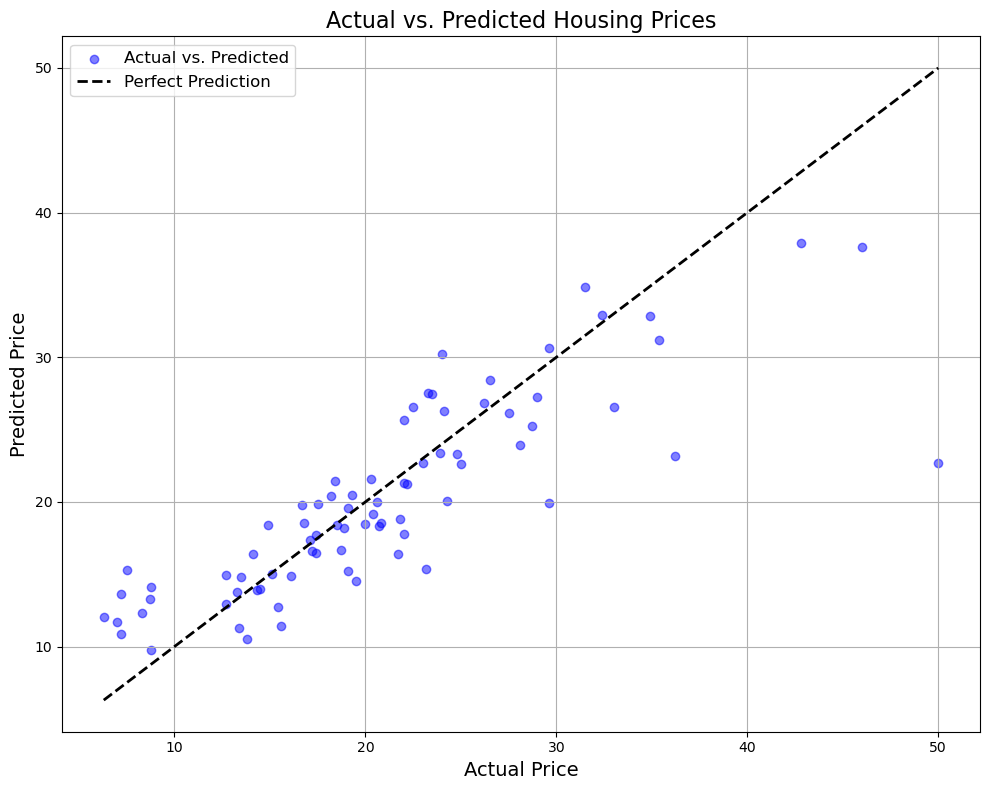

In [14]:
y_pred = model.predict(test_x).flatten()

plt.figure(figsize=(10, 8))
plt.scatter(test_y, y_pred, color='blue', alpha=0.5, label='Actual vs. Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Actual vs. Predicted Housing Prices', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
data.info

NameError: name 'data' is not defined